In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])

In [3]:
df.sample(5)

,label,message
305,spam,SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...
2659,ham,Not yet chikku..wat abt u?
4148,ham,Pls help me tell sura that i'm expecting a bat...
3334,spam,You are being contacted by our dating service ...
3993,ham,"Dizzamn, aight I'll ask my suitemates when I g..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df =df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

In [12]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

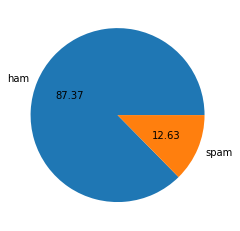

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters'] = df['message'].apply(len)

In [16]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.describe()

,label,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,79.344554,18.591023,1.954924
std,0.332253,58.437457,13.402840,1.366937
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,119.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [21]:
# Ham
df[df['label']==0].describe()

,label,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.905890,17.264836,1.806244
std,0.0,56.715046,13.587852,1.281910
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [22]:
# Spam
df[df['label']==1].describe()

,label,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.704441,27.762634,2.983155
std,0.0,29.821348,6.993008,1.489645
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,8.000000


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

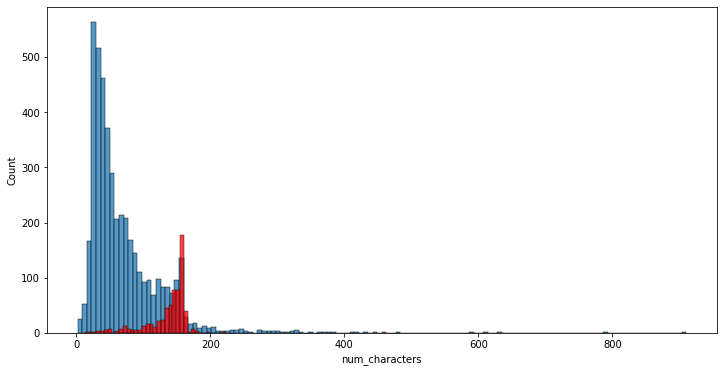

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

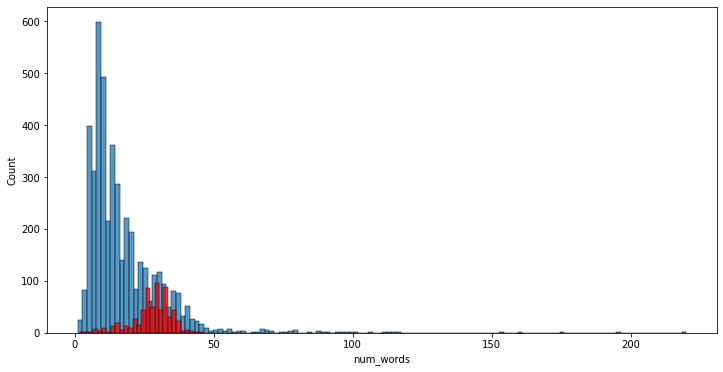

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

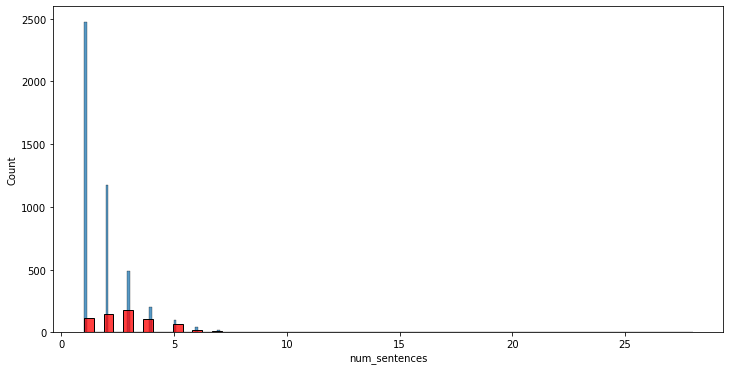

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')

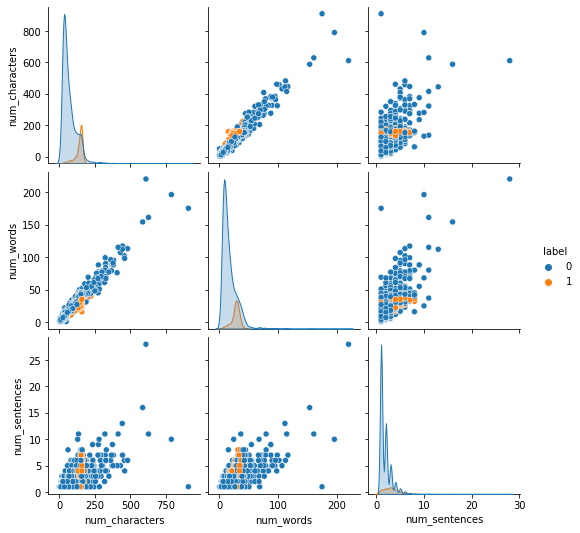

In [27]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

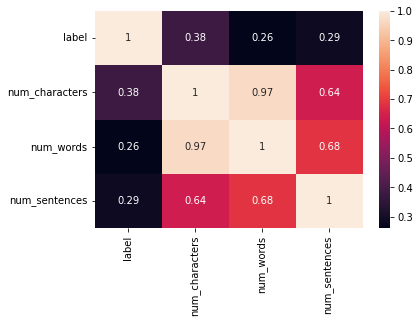

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return ' '.join(y)

In [31]:
df['transformed_text'] = df['message'].apply(transform_text)

In [32]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
spam_corpus = []
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


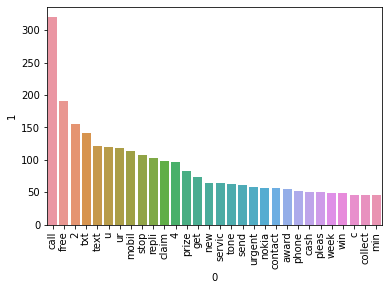

In [34]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
ham_corpus = []
for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


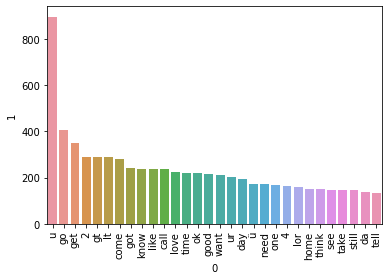

In [36]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [38]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [39]:
X.shape

(5169, 6782)

In [40]:
y = df['label'].values

In [41]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8684719535783365
[[794 114]
 [ 22 104]]
0.47706422018348627


In [46]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[908   0]
 [ 42  84]]
1.0


In [47]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [50]:
clfs = {
       'SVC':svc,
       'KN': knc,
       'NB': mnb,
       'DT': dtc,
       'LR': lrc,
       'RF': rfc,
       'AdaBoost': abc,
       'BgC': bc,
       'ETC': etc,
       'GBDT': gbdt,
       'xgb': xgb
       }

In [51]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [52]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9709864603481625, 1.0)

In [53]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy:  0.9709864603481625
Precision:  1.0
For KN
Accuracy:  0.9100580270793037
Precision:  1.0
For NB
Accuracy:  0.9593810444874274
Precision:  1.0
For DT
Accuracy:  0.9400386847195358
Precision:  0.8404255319148937
For LR
Accuracy:  0.9458413926499033
Precision:  0.926829268292683
For RF
Accuracy:  0.9671179883945842
Precision:  0.9893617021276596
For AdaBoost
Accuracy:  0.9584139264990329
Precision:  0.9108910891089109
For BgC
Accuracy:  0.9622823984526112
Precision:  0.8717948717948718
For ETC
Accuracy:  0.971953578336557
Precision:  0.98989898989899
For GBDT
Accuracy:  0.9487427466150871
Precision:  0.9294117647058824
For xgb
Accuracy:  0.9690522243713733
Precision:  0.9607843137254902


In [54]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [55]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.970986,1.000000
1,KN,0.910058,1.000000
2,NB,0.959381,1.000000
8,ETC,0.971954,0.989899
5,RF,0.967118,0.989362
10,xgb,0.969052,0.960784
9,GBDT,0.948743,0.929412
4,LR,0.945841,0.926829
6,AdaBoost,0.958414,0.910891
7,BgC,0.962282,0.871795


In [56]:
performance_df = pd.melt(performance_df, id_vars='Algorithm')
performance_df

,Algorithm,variable,value
0,SVC,Accuracy,0.970986
1,KN,Accuracy,0.910058
2,NB,Accuracy,0.959381
3,ETC,Accuracy,0.971954
4,RF,Accuracy,0.967118
5,xgb,Accuracy,0.969052
6,GBDT,Accuracy,0.948743
7,LR,Accuracy,0.945841
8,AdaBoost,Accuracy,0.958414
9,BgC,Accuracy,0.962282


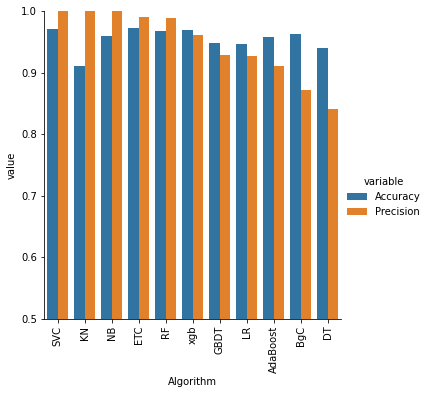

In [57]:
sns.catplot(x='Algorithm',y='value', hue='variable',data=performance_df, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(SVC,open('model.pkl','wb'))